In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [28]:
Target = 'Infected'
NonTarget = ['Fatal', 'Cured']

In [37]:
data = pd.read_csv('processed_data.csv', index_col=[0], parse_dates=[0])
len(data)

54

In [41]:
data = data.drop(NonTarget, axis = 1)

In [42]:
data

,Infected
index,
2020-03-21,9.0
2020-03-22,29.0
2020-03-23,22.0
2020-03-24,12.0
2020-03-25,29.0
2020-03-26,24.0
2020-03-27,18.0
2020-03-28,18.0
2020-03-29,18.0


In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

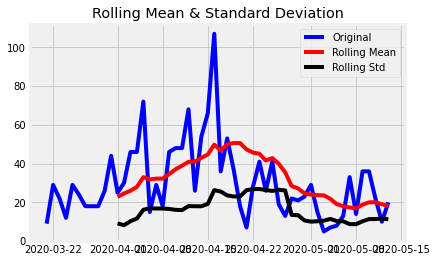

Results of Dickey-Fuller Test:
Test Statistic                 -2.869797
p-value                         0.048975
#Lags Used                      1.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [44]:
test_stationarity(data)

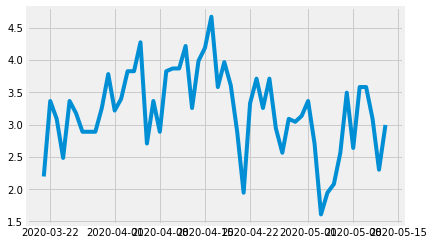

In [45]:
data_log = np.log(data)
plt.plot(data_log)

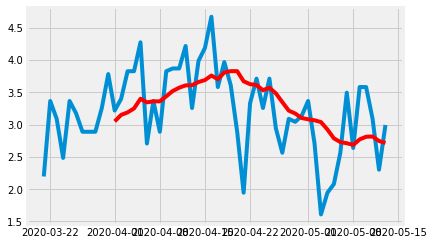

In [46]:
moving_avg = data_log.rolling(12).mean()
plt.plot(data_log)
plt.plot(moving_avg, color = 'red')


In [48]:
data_log_moving_avg_diff = data_log - moving_avg
data_log_moving_avg_diff.head(12)

,Infected
index,
2020-03-21,NaN
2020-03-22,NaN
2020-03-23,NaN
2020-03-24,NaN
2020-03-25,NaN
2020-03-26,NaN
2020-03-27,NaN
2020-03-28,NaN
2020-03-29,NaN


In [49]:
data_log_moving_avg_diff.dropna(inplace=True)
data_log_moving_avg_diff.head()

,Infected
index,
2020-04-01,0.167368
2020-04-02,0.249358
2020-04-03,0.638357
2020-04-04,0.576890
2020-04-05,0.875602


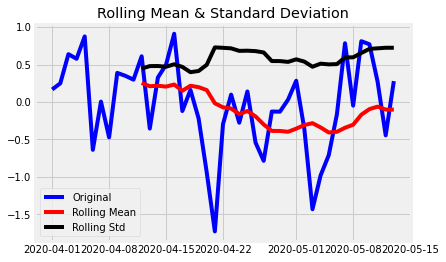

Results of Dickey-Fuller Test:
Test Statistic                 -3.982113
p-value                         0.001507
#Lags Used                      0.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [50]:
test_stationarity(data_log_moving_avg_diff)